In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import pip

#pip.main(['install', 'pandas_datareader'])
# pip.main(['install', 'tensorflow'])
import pandas_datareader as web
import datetime as dt

In [192]:
crypto_currency = 'BTC'
against_currency = 'USD'
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

df = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)
print(df.head())

                    High           Low          Open         Close  \
Date                                                                 
2018-01-01  14112.200195  13154.700195  14112.200195  13657.200195   
2018-01-02  15444.599609  13163.599609  13625.000000  14982.099609   
2018-01-03  15572.799805  14844.500000  14978.200195  15201.000000   
2018-01-04  15739.700195  14522.200195  15270.700195  15599.200195   
2018-01-05  17705.199219  15202.799805  15477.200195  17429.500000   

                  Volume     Adj Close  
Date                                    
2018-01-01  1.029120e+10  13657.200195  
2018-01-02  1.684660e+10  14982.099609  
2018-01-03  1.687190e+10  15201.000000  
2018-01-04  2.178320e+10  15599.200195  
2018-01-05  2.384090e+10  17429.500000  


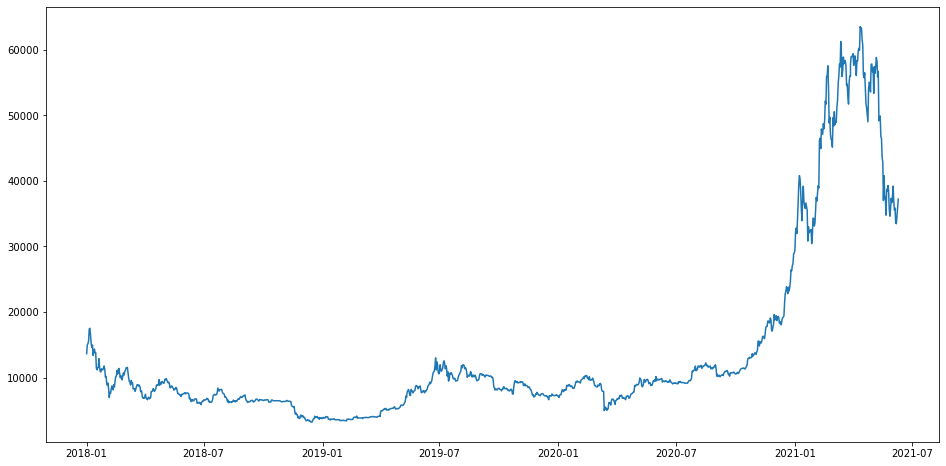

In [193]:
#setting index as date
df['Date'] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.index = df['Date']

#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')

In [194]:
df['Date'] = pd.to_datetime(df.index,format='%Y-%m-%d')
df.index = df['Date']

In [195]:
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]
print(new_data)

                     Date    Close
0     2018-01-01 00:00:00  13657.2
1     2018-01-02 00:00:00  14982.1
2     2018-01-03 00:00:00    15201
3     2018-01-04 00:00:00  15599.2
4     2018-01-05 00:00:00  17429.5
...                   ...      ...
1247  2021-06-04 00:00:00    35552
1248  2021-06-05 00:00:00  35862.4
1249  2021-06-06 00:00:00  33560.7
1250  2021-06-07 00:00:00  33472.6
1251  2021-06-10 00:00:00  37221.6

[1252 rows x 2 columns]


In [196]:
size = int(new_data.shape[0] *.80)
size_inv = int(new_data.shape[0] - size)
train = new_data[:size]
valid = new_data[size:]
print(train)

                     Date    Close
0     2018-01-01 00:00:00  13657.2
1     2018-01-02 00:00:00  14982.1
2     2018-01-03 00:00:00    15201
3     2018-01-04 00:00:00  15599.2
4     2018-01-05 00:00:00  17429.5
...                   ...      ...
996   2020-09-23 00:00:00  10745.5
997   2020-09-24 00:00:00  10702.3
998   2020-09-25 00:00:00  10754.4
999   2020-09-26 00:00:00  10774.4
1000  2020-09-27 00:00:00  10721.3

[1001 rows x 2 columns]


In [197]:
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-size_inv+i:].sum() + sum(preds)
    b = a/size_inv
    preds.append(b)

<ipython-input-198-0975a268a2bd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = 0
<ipython-input-198-0975a268a2bd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = preds


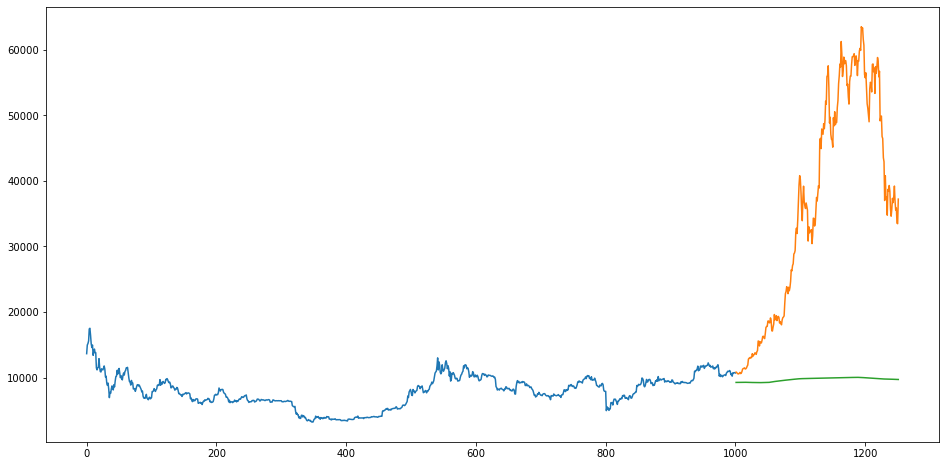

In [198]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.figure(figsize=(16,8))
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])

In [199]:
print(valid['Close'], valid['Predictions'])

1001    10848.8
1002    10787.6
1003    10623.3
1004    10585.2
1005    10565.5
         ...   
1247      35552
1248    35862.4
1249    33560.7
1250    33472.6
1251    37221.6
Name: Close, Length: 251, dtype: object 1001    9275.428777
1002    9277.538475
1003    9279.915617
1004    9283.395298
1005    9286.733787
           ...     
1247    9739.183363
1248    9735.173939
1249    9731.320886
1250    9727.244725
1251    9723.072685
Name: Predictions, Length: 251, dtype: float64
